In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
return_df =pd.read_csv("return_df.csv") 

In [62]:
return_df.ReturnRate = return_df.ReturnRate*100

In [63]:
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

In [64]:
return_df = return_df[return_df.SALEDATE >= "2004-08-30"]

In [65]:
return_df = return_df.dropna()

In [66]:
return_df['Month'] = pd.to_datetime(return_df['SALEDATE']).dt.month
return_df['Quarter'] = pd.to_datetime(return_df['SALEDATE']).dt.quarter
return_df['Day'] = pd.to_datetime(return_df['SALEDATE']).dt.dayofweek 

In [67]:
X = return_df.drop(['ReturnRate','SALEDATE', 'STORE'], axis=1)
y = return_df['ReturnRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear Regression

In [68]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ReturnRate   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     4834.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:02:09   Log-Likelihood:            -1.8624e+05
No. Observations:               81232   AIC:                         3.725e+05
Df Residuals:                   81217   BIC:                         3.726e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.7957      0.087     20.695      0.000       1.626       1.966
PreviousDayReturnRate      33.5276      0.312    107.477      0.000      32.916      34.139
PreviousWeekReturnRate     13.1261      0.299     43.963      0.000      12.541      13.711
PreviousMonthReturnRate    -1.6970      0.267     -6.357      0.000      -2.220      -1.174
NumTrans                   -0.0042   8.95e-05    -46.625      0.000      -0.004      -0.004
DiscountSalesCount          0.0024   5.75e-05     40.907      0.000       0.002       0.002
AmtTrans                  1.72e-05   2.98e-06      5.780      0.000    1.14e-05     2.3e-05
AvgPrice                    0.1423      0.003     48.616      0.000       0.137       0.148
PreviousDayTrans            0.0021   5.11e-05     42.014      0.000       0.002       0.002
PreviousDayAmtTrans       -4.3e-05   2.37e-06    -18.136      0.000   -4.76e-05   -3.84e-05
Last30DaysTrans          4.656e-05   2.35e-06     19.781      0.000    4.19e-05    5.12e-05
Last30DaysAmtTrans        1.37e-07    9.8e-08      1.398      0.162    -5.5e-08    3.29e-07
Month                      -0.0100      0.011     -0.926      0.354      -0.031       0.011
Quarter                     0.0060      0.033      0.183      0.855      -0.058       0.070
Day                        -0.2549      0.005    -49.651      0.000      -0.265      -0.245
==============================================================================
Omnibus:                    35303.543   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1050325.450
Skew:                           1.488   Prob(JB):                         0.00
Kurtosis:                      20.363   Cond. No.                     3.27e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
X_test_sm = sm.add_constant(X_test)
# Make predictions on the test set
y_test_pred = model.predict(X_test_sm)
# Calculate residuals
residuals = y_test - y_test_pred

# Compute the Mean Squared Error
mse = np.mean(residuals**2)

# To calculate the R-squared for the test set manually
ss_total = np.sum((y_test - np.mean(y_test))**2)  # Total sum of squares
ss_res = np.sum(residuals**2)                      # Residual sum of squares
r_squared = 1 - (ss_res / ss_total)

# Now, you can print or return these statistics
print(f"Test MSE: {mse}")
print(f"Test R-squared: {r_squared}")

Test MSE: 5.90965734899035
Test R-squared: 0.4584762157758917


#### Random Forest

In [42]:
# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, max_depth = 20,random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the Mean Squared Error
test_mse = mean_squared_error(y_test, y_pred)
train_mse = mean_squared_error(y_train, rf.predict(X_train))

In [43]:
print("Training MSE for Random Forest is", train_mse)
print("Test MSE for Random Forest is", test_mse)

Training MSE for Random Forest is 1.2586390070279951
Test MSE for Random Forest is 4.6385041531796976


In [44]:
rf.score(X_test, y_test)

0.5749566897312146

In [45]:
rf.score(X_train, y_train)

0.8803949359424019

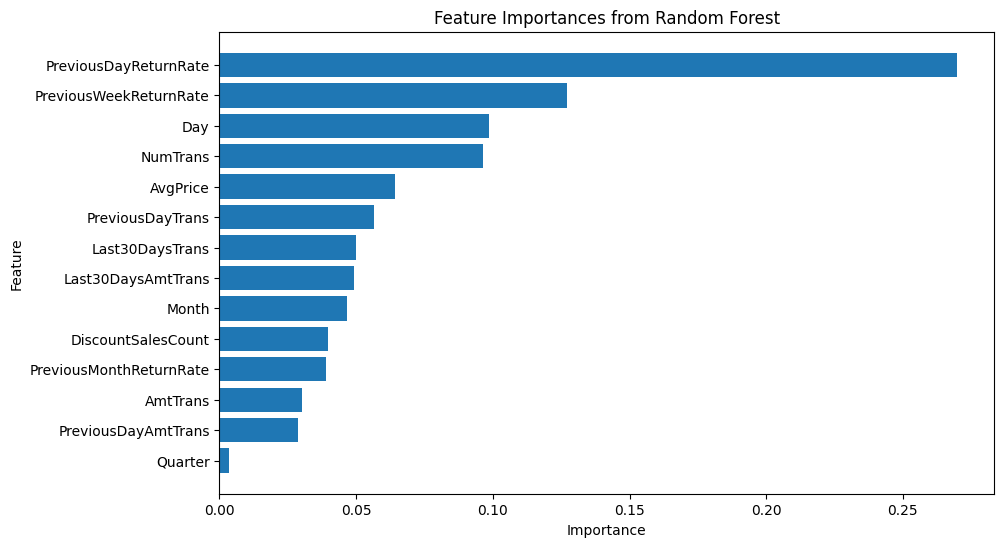

In [46]:
importances = rf.feature_importances_

# Convert the importances into a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis() # To display the highest importance at the top
plt.show()

## LSTM

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, TensorDataset, DataLoader

In [48]:
# Split the data into training and testing sets in order
train_features = torch.tensor(X_train.to_numpy(), dtype=torch.float32).unsqueeze(1)
test_features = torch.tensor(X_test.to_numpy(), dtype=torch.float32).unsqueeze(1)
test_target = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)
train_target = torch.tensor(y_train.to_numpy(), dtype=torch.float32).unsqueeze(1)

# Convert the training and testing sets into TensorDatasets
train_dataset = TensorDataset(train_features, train_target)
test_dataset = TensorDataset(test_features, test_target)

# Create DataLoaders without shuffling
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [49]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1, :])
        return out

In [72]:
# Instantiate the model
model = LSTMModel(input_size=train_features.shape[2], hidden_size=128, num_layers=3, output_size=1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.MSELoss()

num_epochs = 50  # or any number of epochs you wish to train for

train_loss_list = []
test_loss_list = []
for epoch in range(num_epochs):
    running_loss_train = []
    running_loss_test = []
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)  # Make sure targets are the correct shape
        loss.backward()
        optimizer.step()

        # Sum up the loss for the epoch
        running_loss_train.append(loss.item())
        
    model.eval()
    with torch.no_grad():     
        for test_inputs, test_targets in test_loader:
            test_outputs = model(test_inputs)
            test_loss = criterion(test_outputs, test_targets)
            running_loss_test.append(test_loss.item())
        
    # Calculate average losses for the epoch
    epoch_loss_train = np.mean(running_loss_train)
    epoch_loss_test = np.mean(running_loss_test)

    # Print the epoch's loss and MSE
    print(f'Epoch {epoch+1}/{num_epochs} - Training loss: {epoch_loss_train:.4f}, - test loss: {epoch_loss_test:.4f} ')
    train_loss_list.append(epoch_loss_train)
    test_loss_list.append(epoch_loss_test)
    model.train()

Epoch 1/50 - Training loss: 73.5673, - test loss: 57.2849 
Epoch 2/50 - Training loss: 33.4471, - test loss: 18.9561 
Epoch 3/50 - Training loss: 14.0458, - test loss: 11.8351 
Epoch 4/50 - Training loss: 10.7302, - test loss: 10.7427 
Epoch 5/50 - Training loss: 10.2288, - test loss: 10.5058 
Epoch 6/50 - Training loss: 10.0490, - test loss: 10.3295 
Epoch 7/50 - Training loss: 9.7442, - test loss: 9.8453 
Epoch 8/50 - Training loss: 9.1375, - test loss: 9.1720 
Epoch 9/50 - Training loss: 8.5047, - test loss: 8.5878 
Epoch 10/50 - Training loss: 8.0311, - test loss: 8.3082 
Epoch 11/50 - Training loss: 7.9138, - test loss: 8.2658 
Epoch 12/50 - Training loss: 7.8571, - test loss: 8.0984 
Epoch 13/50 - Training loss: 7.8403, - test loss: 8.2137 
Epoch 14/50 - Training loss: 7.7415, - test loss: 8.0191 
Epoch 15/50 - Training loss: 7.7603, - test loss: 8.0270 
Epoch 16/50 - Training loss: 7.6712, - test loss: 7.9447 
Epoch 17/50 - Training loss: 7.7343, - test loss: 8.0964 
Epoch 18/50

In [27]:
# Evaluate the model
model.eval()
total_loss = []
for inputs, targets in test_loader:
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    total_loss.append(loss.detach().numpy())
print("mse is", np.mean(total_loss))

mse is 8.422985


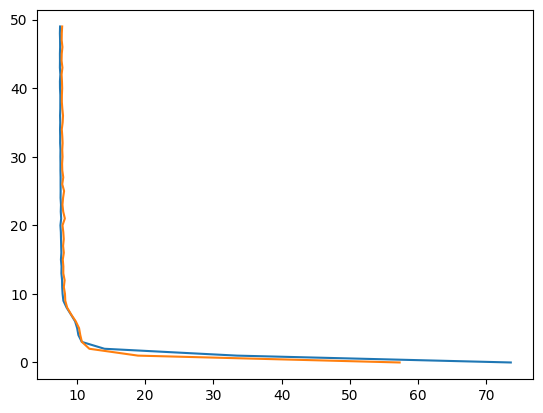

In [82]:
plt.plot(train_loss_list, np.arange(50))
plt.plot(test_loss_list, np.arange(50))

tensor([[4.4654],
        [7.0714],
        [5.4108],
        [6.3420],
        [6.3004],
        [6.6222],
        [5.8041],
        [6.0854],
        [6.4167],
        [5.1787],
        [5.6711],
        [0.2625],
        [4.5962]])

In [64]:
from sklearn.neural_network import MLPRegressor

# Create a Multi-Layer Perceptron Regressor model
# This is a simple neural network with 1 hidden layer of 128 neurons
mlp = MLPRegressor(hidden_layer_sizes=(128,64,1), solver='adam', max_iter=500, random_state=42)

# Fit the model on the training data
mlp.fit(X_train, y_train)

# Predict on the test data
y_pred_mlp = mlp.predict(X_test)

# Calculate the Mean Squared Error for the neural network predictions
mse_mlp = mean_squared_error(y_test, y_pred_mlp)



In [65]:
mse_mlp

10.621953281093042

In [66]:
np.mean(y_test)

8.397878797548358

In [32]:
transaction = pd.read_csv("../trnsact_new.csv")

In [54]:
seq_num = transaction[(transaction['SEQ'] == 0)]

In [55]:
seq_num.

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,UNKNOWN
3,3,709,360,500,0,2005-08-14,P,1,0.0,30.0,30.0,6500000,818,0
4,3,802,660,400,0,2005-08-09,P,1,440.0,30.0,30.0,4700000,599,0
5,3,1202,400,2100,0,2004-11-11,P,1,0.0,30.0,30.0,8600000,999,0
6,3,1204,220,3400,0,2004-12-22,P,1,0.0,30.0,30.0,17600000,555,0
7,3,1304,160,3500,0,2004-08-07,P,1,0.0,30.0,30.0,11400000,990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120916889,9999997,2707,130,12900,0,2005-08-05,P,1,39.0,19.5,19.5,72800124,395,0
120916891,9999997,7507,750,2800,0,2005-04-23,P,1,39.0,39.0,39.0,593900116,395,0
120916892,9999997,7907,790,3200,0,2005-05-03,P,1,39.0,39.0,39.0,502600061,395,0
120916893,9999997,7907,800,700,0,2005-05-04,R,1,39.0,39.0,39.0,600900066,395,0
